Understand the objective
### You are predicting the species of an iris flower using four measurements.
### Inputs: sepal length, sepal width, petal length, petal width
### Target: setosa, versicolor, virginica

In [20]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns


In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\blend\.cache\kagglehub\datasets\uciml\iris\versions\2


In [22]:
df = pd.read_csv(path + "/Iris.csv")

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [25]:
# Map full species names to short labels and assign back
df['Species'] = df['Species'].map({
    'Iris-setosa': 'setosa',
    'Iris-versicolor': 'versicolor',
    'Iris-virginica': 'virginica'
})

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


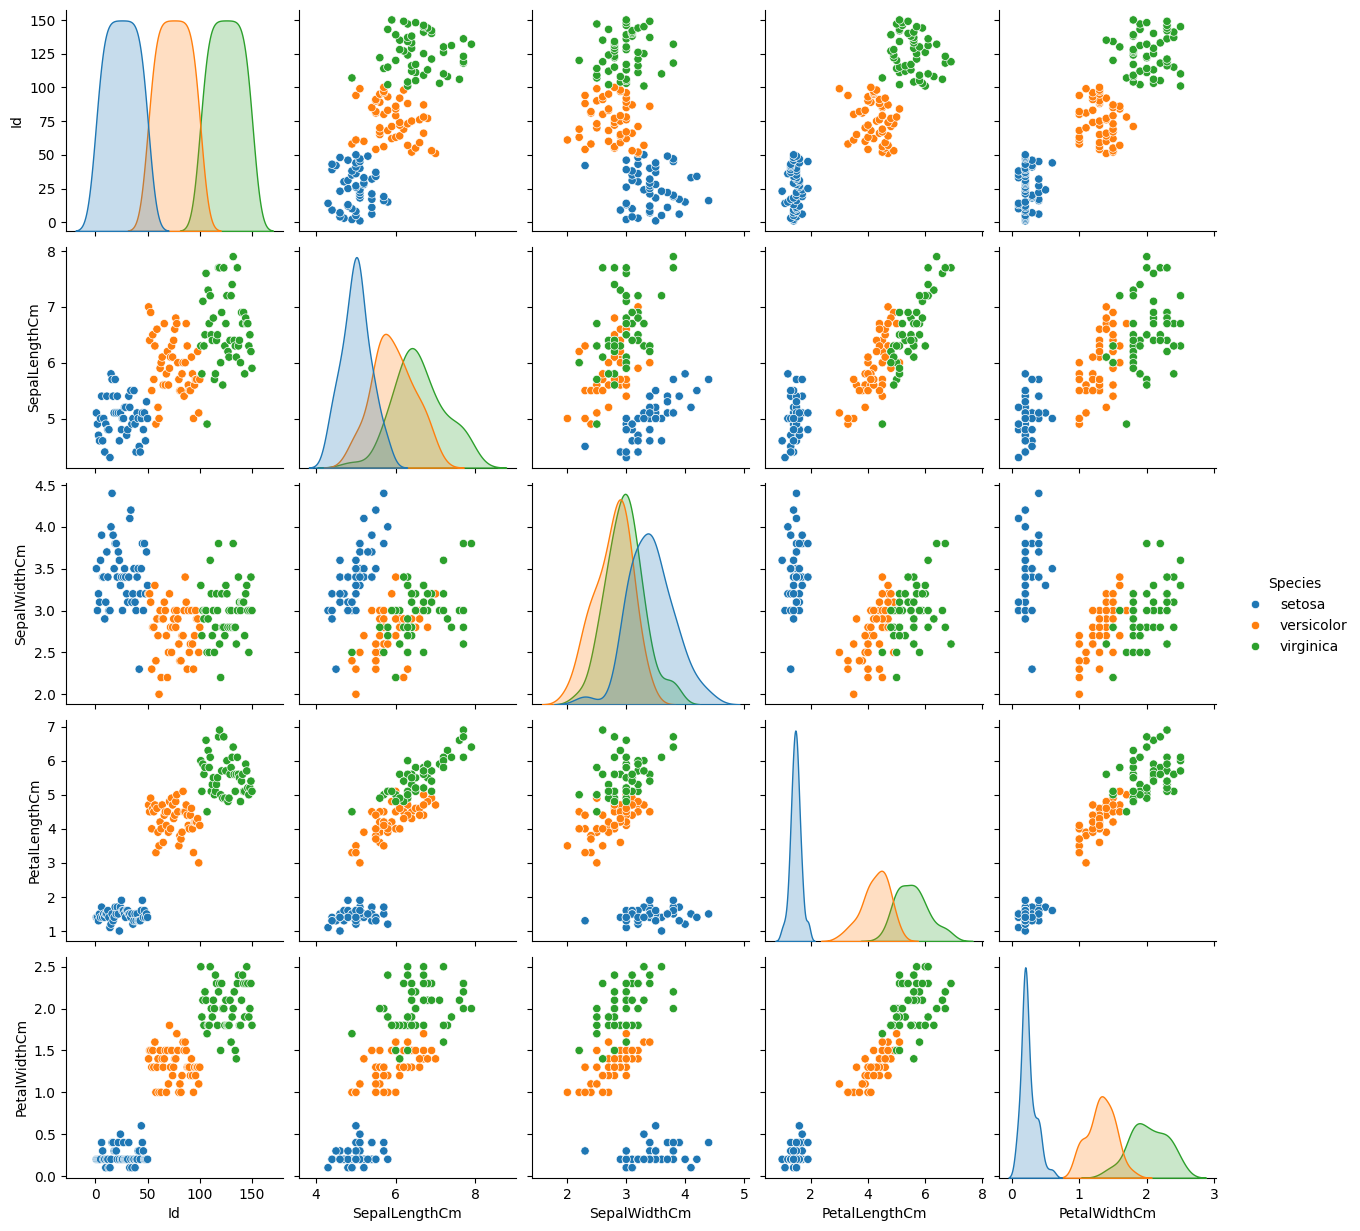

In [27]:
sns.pairplot(df, hue='Species')

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

k nearest neighbours predicts the class of a new point based on the classes of the closest points in the training data - follows a simple assumption: close points tend to belong to same class

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

1.0
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


knn classified every single flower in test set correctly

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

accuracy_score(y_test, pred_rf)

1.0

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [2, 4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.9916666666666668


best performing trees had depth of 2 (shallow), means classes are easy to seperate.
50 trees were enough to stabilise predictions
